In [5]:
from time import sleep

def inc(x):
    sleep(1)
    return x + 1

def add(x, y):
    sleep(1)
    return x + y

In [6]:
%%time

x = inc(1)
y = inc(2)
z = add(x, y)

Wall time: 3 s


## Parallelize with the dask.delayed

In [7]:
from dask import delayed

It is kind wrapper which is used as a decorator<br>


the delayed function is meant to be used as a decorator like so:

@delayed<br>
def inc(x):<br>
    sleep(1)<br>
    return x + 1<br>

@delayed<br>
def add(x, y):<br>
    sleep(1)<br>
    return x + y<br>
    <br>
but since I want to keep the original functions for comparison, I'll call it directly

In [9]:
%%time

x = delayed(inc)(1)
y = delayed(inc)(2)
z = delayed(add)(x, y)

Wall time: 0 ns


**This ran immediately, since nothing has really happened yet.**<br>

The z object is a lazy Delayed object. This object holds everything we need to compute the final result, including references to all of the functions that are required and their inputs and relationship to one-another.

In [10]:
z

Delayed('add-a96b266c-2d52-4533-87da-4c55c61593c2')

We can visualize the task graph for this value with .visualize():

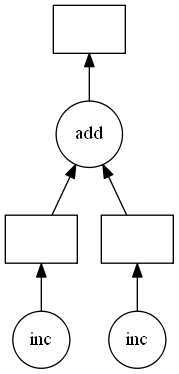

In [13]:
z.visualize()

If there is an error for garphviz dependency please do<br>

**conda install -c anaconda python-graphviz**

To get the result, call compute. Notice that this runs faster than the original code.

In [15]:
%%time

z.compute()

Wall time: 2.01 s


5

## Parallelizing a for loop

In [16]:
data = [1, 2, 3, 4, 5, 6, 7, 8]

In [17]:
%%time

results = []
for x in data:
    y = inc(x)
    results.append(y)
    
total = sum(results)

Wall time: 8.01 s


In [21]:
%%time
results = []

for x in data:
    y = delayed(inc)(x)
    results.append(y)
    
total = delayed(sum)(results)

total.compute()

Wall time: 1.02 s


44

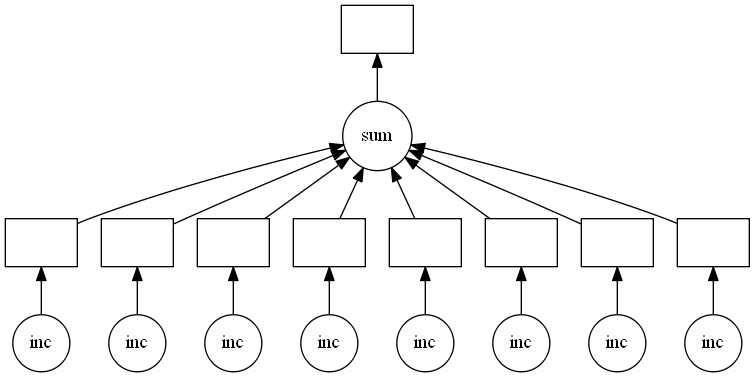

In [22]:
total.visualize()